In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [ ]:
!pip 

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

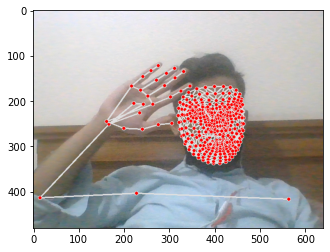

In [9]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
result_test = extract_keypoints(results)
result_test

array([ 0.6175946 ,  0.50771326, -1.31227553, ...,  0.43246841,
        0.25509071, -0.02436301])

In [147]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['nothing','hello', 'thanks', 'ok', 'bad', 'victory'])
    
# Twenty(20) videos worth of data
no_sequences = 10

# Videos are going to be 20 frames in length
sequence_length = 10

In [148]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [149]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [150]:
cap.release()
cv2.destroyAllWindows()

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [152]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [153]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'nothing': 0, 'hello': 1, 'thanks': 2, 'ok': 3, 'bad': 4, 'victory': 5}

In [154]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [155]:
np.array(sequences).shape

(60, 10, 1662)

In [156]:
y = to_categorical(labels).astype(int)
X = np.array(sequences)
X.shape

(60, 10, 1662)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(3, 6)

In [159]:
np.array(labels).shape


(60,)

In [160]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [161]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [162]:
res = [.7, 0.2, 0.1]
actions[np.argmax(res)]

'nothing'

In [163]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [164]:
model.fit(X_train, y_train, epochs=1200, callbacks=[tb_callback])

Epoch 1/1200
2/2 [==============================] - 3s 89ms/step - loss: 1.9038 - categorical_accuracy: 0.1754
Epoch 2/1200
2/2 [==============================] - 0s 70ms/step - loss: 1.7976 - categorical_accuracy: 0.2281
Epoch 3/1200
2/2 [==============================] - 0s 85ms/step - loss: 1.7960 - categorical_accuracy: 0.1053
Epoch 4/1200
2/2 [==============================] - 0s 76ms/step - loss: 1.7895 - categorical_accuracy: 0.1754
Epoch 5/1200
2/2 [==============================] - 0s 69ms/step - loss: 1.7846 - categorical_accuracy: 0.1754
Epoch 6/1200
2/2 [==============================] - 0s 81ms/step - loss: 1.7808 - categorical_accuracy: 0.1404
Epoch 7/1200
2/2 [==============================] - 0s 67ms/step - loss: 1.7659 - categorical_accuracy: 0.2456
Epoch 8/1200
2/2 [==============================] - 0s 89ms/step - loss: 1.7750 - categorical_accuracy: 0.1754
Epoch 9/1200
2/2 [==============================] - 0s 68ms/step - loss: 1.7082 - categorical_accuracy: 0.3509
E

2/2 [==============================] - 0s 69ms/step - loss: 1.2558 - categorical_accuracy: 0.3684
Epoch 74/1200
2/2 [==============================] - 0s 106ms/step - loss: 1.2391 - categorical_accuracy: 0.5614
Epoch 75/1200
2/2 [==============================] - 0s 101ms/step - loss: 1.2317 - categorical_accuracy: 0.5439
Epoch 76/1200
2/2 [==============================] - 0s 115ms/step - loss: 1.1724 - categorical_accuracy: 0.5614
Epoch 77/1200
2/2 [==============================] - 0s 83ms/step - loss: 1.1191 - categorical_accuracy: 0.5965
Epoch 78/1200
2/2 [==============================] - 0s 94ms/step - loss: 1.0562 - categorical_accuracy: 0.6140
Epoch 79/1200
2/2 [==============================] - 0s 72ms/step - loss: 0.9849 - categorical_accuracy: 0.5789
Epoch 80/1200
2/2 [==============================] - 0s 97ms/step - loss: 0.9297 - categorical_accuracy: 0.5965
Epoch 81/1200
2/2 [==============================] - 0s 100ms/step - loss: 0.8579 - categorical_accuracy: 0.5965
Ep

2/2 [==============================] - 0s 81ms/step - loss: 0.7399 - categorical_accuracy: 0.5965
Epoch 146/1200
2/2 [==============================] - 0s 72ms/step - loss: 0.4095 - categorical_accuracy: 0.7719
Epoch 147/1200
2/2 [==============================] - 0s 98ms/step - loss: 0.3908 - categorical_accuracy: 0.8246
Epoch 148/1200
2/2 [==============================] - 0s 85ms/step - loss: 0.3715 - categorical_accuracy: 0.8596
Epoch 149/1200
2/2 [==============================] - 0s 82ms/step - loss: 0.3698 - categorical_accuracy: 0.8947
Epoch 150/1200
2/2 [==============================] - 0s 100ms/step - loss: 0.3427 - categorical_accuracy: 0.8772
Epoch 151/1200
2/2 [==============================] - 0s 66ms/step - loss: 0.4018 - categorical_accuracy: 0.7895
Epoch 152/1200
2/2 [==============================] - 0s 88ms/step - loss: 0.4438 - categorical_accuracy: 0.7719
Epoch 153/1200
2/2 [==============================] - 0s 67ms/step - loss: 0.4349 - categorical_accuracy: 0.73

2/2 [==============================] - 0s 93ms/step - loss: 0.6233 - categorical_accuracy: 0.8070
Epoch 217/1200
2/2 [==============================] - 0s 109ms/step - loss: 0.5893 - categorical_accuracy: 0.7895
Epoch 218/1200
2/2 [==============================] - 0s 66ms/step - loss: 0.5636 - categorical_accuracy: 0.7544
Epoch 219/1200
2/2 [==============================] - 0s 80ms/step - loss: 0.5041 - categorical_accuracy: 0.8246
Epoch 220/1200
2/2 [==============================] - 0s 72ms/step - loss: 0.4818 - categorical_accuracy: 0.8070
Epoch 221/1200
2/2 [==============================] - 0s 77ms/step - loss: 0.4344 - categorical_accuracy: 0.8772
Epoch 222/1200
2/2 [==============================] - 0s 75ms/step - loss: 0.4296 - categorical_accuracy: 0.8421
Epoch 223/1200
2/2 [==============================] - 0s 78ms/step - loss: 0.3786 - categorical_accuracy: 0.9123
Epoch 224/1200
2/2 [==============================] - 0s 86ms/step - loss: 0.3601 - categorical_accuracy: 0.91

2/2 [==============================] - 0s 67ms/step - loss: 0.3400 - categorical_accuracy: 0.8596
Epoch 288/1200
2/2 [==============================] - 0s 75ms/step - loss: 0.3228 - categorical_accuracy: 0.8070
Epoch 289/1200
2/2 [==============================] - 0s 112ms/step - loss: 0.3462 - categorical_accuracy: 0.8070
Epoch 290/1200
2/2 [==============================] - 0s 103ms/step - loss: 0.3019 - categorical_accuracy: 0.8947
Epoch 291/1200
2/2 [==============================] - 0s 77ms/step - loss: 0.3723 - categorical_accuracy: 0.8947
Epoch 292/1200
2/2 [==============================] - 0s 89ms/step - loss: 0.4014 - categorical_accuracy: 0.8596
Epoch 293/1200
2/2 [==============================] - 0s 114ms/step - loss: 0.5346 - categorical_accuracy: 0.8421
Epoch 294/1200
2/2 [==============================] - 0s 115ms/step - loss: 0.7102 - categorical_accuracy: 0.7193
Epoch 295/1200
2/2 [==============================] - 0s 71ms/step - loss: 0.5728 - categorical_accuracy: 0

Epoch 359/1200
2/2 [==============================] - 0s 65ms/step - loss: 0.0845 - categorical_accuracy: 0.9825
Epoch 360/1200
2/2 [==============================] - 0s 88ms/step - loss: 0.0857 - categorical_accuracy: 0.9825
Epoch 361/1200
2/2 [==============================] - 0s 74ms/step - loss: 0.0926 - categorical_accuracy: 0.9825
Epoch 362/1200
2/2 [==============================] - 0s 70ms/step - loss: 0.0728 - categorical_accuracy: 0.9825
Epoch 363/1200
2/2 [==============================] - 0s 72ms/step - loss: 0.0632 - categorical_accuracy: 0.9825
Epoch 364/1200
2/2 [==============================] - 0s 62ms/step - loss: 0.0630 - categorical_accuracy: 0.9825
Epoch 365/1200
2/2 [==============================] - 0s 81ms/step - loss: 0.0400 - categorical_accuracy: 1.0000
Epoch 366/1200
2/2 [==============================] - 0s 75ms/step - loss: 0.2110 - categorical_accuracy: 0.9298
Epoch 367/1200
2/2 [==============================] - 0s 72ms/step - loss: 0.0665 - categorical_

2/2 [==============================] - 0s 82ms/step - loss: 0.1885 - categorical_accuracy: 0.9649
Epoch 432/1200
2/2 [==============================] - 0s 91ms/step - loss: 0.0529 - categorical_accuracy: 1.0000
Epoch 433/1200
2/2 [==============================] - 0s 87ms/step - loss: 0.2241 - categorical_accuracy: 0.9123
Epoch 434/1200
2/2 [==============================] - 0s 81ms/step - loss: 0.1031 - categorical_accuracy: 0.9649
Epoch 435/1200
2/2 [==============================] - 0s 90ms/step - loss: 0.2266 - categorical_accuracy: 0.9123
Epoch 436/1200
2/2 [==============================] - 0s 89ms/step - loss: 0.0820 - categorical_accuracy: 0.9825
Epoch 437/1200
2/2 [==============================] - 0s 94ms/step - loss: 0.2260 - categorical_accuracy: 0.9123
Epoch 438/1200
2/2 [==============================] - 0s 86ms/step - loss: 0.0886 - categorical_accuracy: 1.0000
Epoch 439/1200
2/2 [==============================] - 0s 103ms/step - loss: 0.1260 - categorical_accuracy: 0.92

2/2 [==============================] - 0s 76ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 504/1200
2/2 [==============================] - 0s 72ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 505/1200
2/2 [==============================] - 0s 80ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 506/1200
2/2 [==============================] - 0s 101ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 507/1200
2/2 [==============================] - 0s 82ms/step - loss: 9.9951e-04 - categorical_accuracy: 1.0000
Epoch 508/1200
2/2 [==============================] - 0s 70ms/step - loss: 9.8137e-04 - categorical_accuracy: 1.0000
Epoch 509/1200
2/2 [==============================] - 0s 78ms/step - loss: 9.7531e-04 - categorical_accuracy: 1.0000
Epoch 510/1200
2/2 [==============================] - 0s 67ms/step - loss: 9.4631e-04 - categorical_accuracy: 1.0000
Epoch 511/1200
2/2 [==============================] - 0s 67ms/step - loss: 9.3110e-04 - catego

2/2 [==============================] - 0s 70ms/step - loss: 4.2418e-04 - categorical_accuracy: 1.0000
Epoch 574/1200
2/2 [==============================] - 0s 65ms/step - loss: 4.1946e-04 - categorical_accuracy: 1.0000
Epoch 575/1200
2/2 [==============================] - 0s 78ms/step - loss: 4.1638e-04 - categorical_accuracy: 1.0000
Epoch 576/1200
2/2 [==============================] - 0s 79ms/step - loss: 4.1084e-04 - categorical_accuracy: 1.0000
Epoch 577/1200
2/2 [==============================] - 0s 66ms/step - loss: 4.0710e-04 - categorical_accuracy: 1.0000
Epoch 578/1200
2/2 [==============================] - 0s 87ms/step - loss: 4.0264e-04 - categorical_accuracy: 1.0000
Epoch 579/1200
2/2 [==============================] - ETA: 0s - loss: 3.9856e-04 - categorical_accuracy: 1.00 - 0s 92ms/step - loss: 3.9856e-04 - categorical_accuracy: 1.0000
Epoch 580/1200
2/2 [==============================] - 0s 87ms/step - loss: 3.9577e-04 - categorical_accuracy: 1.0000
Epoch 581/1200
2/2 [=

2/2 [==============================] - 0s 70ms/step - loss: 2.3160e-04 - categorical_accuracy: 1.0000
Epoch 643/1200
2/2 [==============================] - 0s 80ms/step - loss: 2.3017e-04 - categorical_accuracy: 1.0000
Epoch 644/1200
2/2 [==============================] - 0s 87ms/step - loss: 2.2812e-04 - categorical_accuracy: 1.0000
Epoch 645/1200
2/2 [==============================] - 0s 80ms/step - loss: 2.2700e-04 - categorical_accuracy: 1.0000
Epoch 646/1200
2/2 [==============================] - 0s 93ms/step - loss: 2.2523e-04 - categorical_accuracy: 1.0000
Epoch 647/1200
2/2 [==============================] - 0s 89ms/step - loss: 2.2332e-04 - categorical_accuracy: 1.0000
Epoch 648/1200
2/2 [==============================] - ETA: 0s - loss: 2.2155e-04 - categorical_accuracy: 1.00 - 0s 82ms/step - loss: 2.2155e-04 - categorical_accuracy: 1.0000
Epoch 649/1200
2/2 [==============================] - 0s 121ms/step - loss: 2.1983e-04 - categorical_accuracy: 1.0000
Epoch 650/1200
2/2 [

2/2 [==============================] - 0s 107ms/step - loss: 1.4848e-04 - categorical_accuracy: 1.0000
Epoch 712/1200
2/2 [==============================] - 0s 61ms/step - loss: 1.4759e-04 - categorical_accuracy: 1.0000
Epoch 713/1200
2/2 [==============================] - 0s 73ms/step - loss: 1.4676e-04 - categorical_accuracy: 1.0000
Epoch 714/1200
2/2 [==============================] - 0s 89ms/step - loss: 1.4583e-04 - categorical_accuracy: 1.0000
Epoch 715/1200
2/2 [==============================] - 0s 65ms/step - loss: 1.4514e-04 - categorical_accuracy: 1.0000
Epoch 716/1200
2/2 [==============================] - 0s 111ms/step - loss: 1.4439e-04 - categorical_accuracy: 1.0000
Epoch 717/1200
2/2 [==============================] - 0s 77ms/step - loss: 1.4353e-04 - categorical_accuracy: 1.0000
Epoch 718/1200
2/2 [==============================] - 0s 141ms/step - loss: 1.4274e-04 - categorical_accuracy: 1.0000
Epoch 719/1200
2/2 [==============================] - 0s 68ms/step - loss: 1

2/2 [==============================] - 0s 74ms/step - loss: 1.0400e-04 - categorical_accuracy: 1.0000
Epoch 782/1200
2/2 [==============================] - 0s 77ms/step - loss: 1.0341e-04 - categorical_accuracy: 1.0000
Epoch 783/1200
2/2 [==============================] - 0s 70ms/step - loss: 1.0289e-04 - categorical_accuracy: 1.0000
Epoch 784/1200
2/2 [==============================] - 0s 107ms/step - loss: 1.0255e-04 - categorical_accuracy: 1.0000
Epoch 785/1200
2/2 [==============================] - 0s 91ms/step - loss: 1.0211e-04 - categorical_accuracy: 1.0000
Epoch 786/1200
2/2 [==============================] - 0s 67ms/step - loss: 1.0143e-04 - categorical_accuracy: 1.0000
Epoch 787/1200
2/2 [==============================] - 0s 62ms/step - loss: 1.0091e-04 - categorical_accuracy: 1.0000
Epoch 788/1200
2/2 [==============================] - 0s 79ms/step - loss: 1.0064e-04 - categorical_accuracy: 1.0000
Epoch 789/1200
2/2 [==============================] - 0s 79ms/step - loss: 1.0

2/2 [==============================] - 0s 73ms/step - loss: 7.6011e-05 - categorical_accuracy: 1.0000
Epoch 852/1200
2/2 [==============================] - 0s 82ms/step - loss: 7.5532e-05 - categorical_accuracy: 1.0000
Epoch 853/1200
2/2 [==============================] - 0s 85ms/step - loss: 7.5191e-05 - categorical_accuracy: 1.0000
Epoch 854/1200
2/2 [==============================] - 0s 90ms/step - loss: 7.4901e-05 - categorical_accuracy: 1.0000
Epoch 855/1200
2/2 [==============================] - 0s 72ms/step - loss: 7.4575e-05 - categorical_accuracy: 1.0000
Epoch 856/1200
2/2 [==============================] - 0s 91ms/step - loss: 7.4144e-05 - categorical_accuracy: 1.0000
Epoch 857/1200
2/2 [==============================] - 0s 82ms/step - loss: 7.3941e-05 - categorical_accuracy: 1.0000
Epoch 858/1200
2/2 [==============================] - 0s 75ms/step - loss: 7.3571e-05 - categorical_accuracy: 1.0000
Epoch 859/1200
2/2 [==============================] - 0s 67ms/step - loss: 7.32

2/2 [==============================] - 0s 79ms/step - loss: 5.7059e-05 - categorical_accuracy: 1.0000
Epoch 921/1200
2/2 [==============================] - 0s 106ms/step - loss: 5.6846e-05 - categorical_accuracy: 1.0000
Epoch 922/1200
2/2 [==============================] - 0s 109ms/step - loss: 5.6658e-05 - categorical_accuracy: 1.0000
Epoch 923/1200
2/2 [==============================] - 0s 153ms/step - loss: 5.6430e-05 - categorical_accuracy: 1.0000
Epoch 924/1200
2/2 [==============================] - 0s 116ms/step - loss: 5.6135e-05 - categorical_accuracy: 1.0000
Epoch 925/1200
2/2 [==============================] - 0s 135ms/step - loss: 5.5905e-05 - categorical_accuracy: 1.0000
Epoch 926/1200
2/2 [==============================] - 0s 92ms/step - loss: 5.5728e-05 - categorical_accuracy: 1.0000
Epoch 927/1200
2/2 [==============================] - 0s 108ms/step - loss: 5.5517e-05 - categorical_accuracy: 1.0000
Epoch 928/1200
2/2 [==============================] - 0s 61ms/step - loss

2/2 [==============================] - 0s 85ms/step - loss: 4.4266e-05 - categorical_accuracy: 1.0000
Epoch 990/1200
2/2 [==============================] - 0s 67ms/step - loss: 4.4028e-05 - categorical_accuracy: 1.0000
Epoch 991/1200
2/2 [==============================] - 0s 97ms/step - loss: 4.3911e-05 - categorical_accuracy: 1.0000
Epoch 992/1200
2/2 [==============================] - 0s 80ms/step - loss: 4.3746e-05 - categorical_accuracy: 1.0000
Epoch 993/1200
2/2 [==============================] - 0s 84ms/step - loss: 4.3587e-05 - categorical_accuracy: 1.0000
Epoch 994/1200
2/2 [==============================] - 0s 72ms/step - loss: 4.3453e-05 - categorical_accuracy: 1.0000
Epoch 995/1200
2/2 [==============================] - 0s 76ms/step - loss: 4.3261e-05 - categorical_accuracy: 1.0000
Epoch 996/1200
2/2 [==============================] - 0s 90ms/step - loss: 4.3112e-05 - categorical_accuracy: 1.0000
Epoch 997/1200
2/2 [==============================] - 0s 86ms/step - loss: 4.29

2/2 [==============================] - 0s 86ms/step - loss: 3.4848e-05 - categorical_accuracy: 1.0000
Epoch 1059/1200
2/2 [==============================] - 0s 87ms/step - loss: 3.4796e-05 - categorical_accuracy: 1.0000
Epoch 1060/1200
2/2 [==============================] - 0s 98ms/step - loss: 3.4648e-05 - categorical_accuracy: 1.0000
Epoch 1061/1200
2/2 [==============================] - 0s 82ms/step - loss: 3.4501e-05 - categorical_accuracy: 1.0000
Epoch 1062/1200
2/2 [==============================] - 0s 85ms/step - loss: 3.4438e-05 - categorical_accuracy: 1.0000
Epoch 1063/1200
2/2 [==============================] - 0s 73ms/step - loss: 3.4298e-05 - categorical_accuracy: 1.0000
Epoch 1064/1200
2/2 [==============================] - 0s 79ms/step - loss: 3.4169e-05 - categorical_accuracy: 1.0000
Epoch 1065/1200
2/2 [==============================] - 0s 100ms/step - loss: 3.4073e-05 - categorical_accuracy: 1.0000
Epoch 1066/1200
2/2 [==============================] - 0s 101ms/step - 

2/2 [==============================] - 0s 84ms/step - loss: 2.7901e-05 - categorical_accuracy: 1.0000
Epoch 1128/1200
2/2 [==============================] - 0s 80ms/step - loss: 2.7819e-05 - categorical_accuracy: 1.0000
Epoch 1129/1200
2/2 [==============================] - 0s 88ms/step - loss: 2.7736e-05 - categorical_accuracy: 1.0000
Epoch 1130/1200
2/2 [==============================] - 0s 109ms/step - loss: 2.7690e-05 - categorical_accuracy: 1.0000
Epoch 1131/1200
2/2 [==============================] - 0s 87ms/step - loss: 2.7614e-05 - categorical_accuracy: 1.0000
Epoch 1132/1200
2/2 [==============================] - 0s 100ms/step - loss: 2.7560e-05 - categorical_accuracy: 1.0000
Epoch 1133/1200
2/2 [==============================] - 0s 117ms/step - loss: 2.7414e-05 - categorical_accuracy: 1.0000
Epoch 1134/1200
2/2 [==============================] - 0s 78ms/step - loss: 2.7303e-05 - categorical_accuracy: 1.0000
Epoch 1135/1200
2/2 [==============================] - 0s 84ms/step -

2/2 [==============================] - 0s 210ms/step - loss: 2.2663e-05 - categorical_accuracy: 1.0000
Epoch 1196/1200
2/2 [==============================] - 0s 88ms/step - loss: 2.2642e-05 - categorical_accuracy: 1.0000
Epoch 1197/1200
2/2 [==============================] - 0s 103ms/step - loss: 2.2544e-05 - categorical_accuracy: 1.0000
Epoch 1198/1200
2/2 [==============================] - 0s 83ms/step - loss: 2.2490e-05 - categorical_accuracy: 1.0000
Epoch 1199/1200
2/2 [==============================] - 0s 113ms/step - loss: 2.2396e-05 - categorical_accuracy: 1.0000
Epoch 1200/1200
2/2 [==============================] - 0s 94ms/step - loss: 2.2373e-05 - categorical_accuracy: 1.0000


In [165]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 10, 64)            442112    
                                                                 
 lstm_12 (LSTM)              (None, 10, 128)           98816     
                                                                 
 lstm_13 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 6)                 198       
                                                                 
Total params: 596,774
Trainable params: 596,774
Non-tr

In [222]:
res = model.predict(X_test)
actions[np.argmax(res[1])]

'nothing'

In [168]:
model.save('action.h5')

In [169]:
model.load_weights('action.h5')

In [170]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [171]:
yhat = model.predict(X_test)

In [172]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [202]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 1]],

       [[2, 0],
        [0, 1]],

       [[2, 0],
        [0, 1]]], dtype=int64)

In [174]:
accuracy_score(ytrue, yhat)

1.0

In [201]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        #cv2.rectangle(output_frame, (0,30+num*40), (int(prob*100), 40+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [200]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-10:]
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>


<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.sol

In [113]:
cap.release()
cv2.destroyAllWindows()

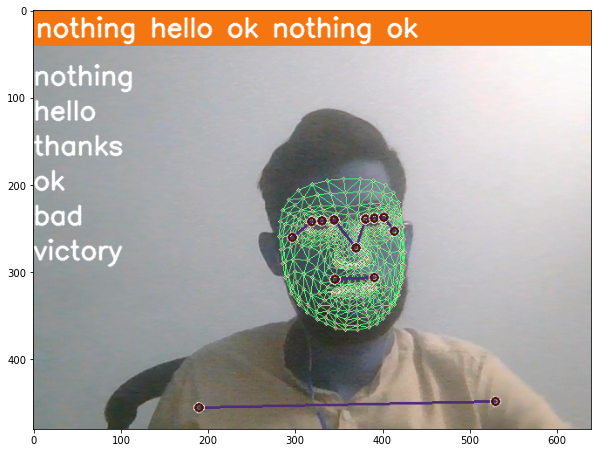

In [181]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [194]:
res[np.argmax(res)] > threshold

True

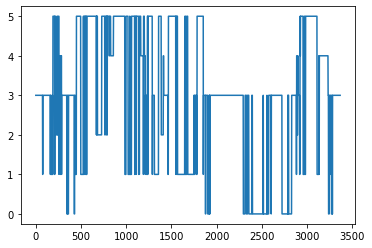

In [191]:
plt.plot(predictions)

In [216]:
predictions[-10:]
#np.unique(predictions[-10:])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 0]